## Project Overwiev of the data: measuremnts 

## 1. Overwiev of the ncfile of  choice 

In [1]:
#Import all needed libraries: 
import os
import numpy as np
import pandas as pd
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr

In [2]:
bouy6_path = 'data/measurements/2023-11-06_Buoy6_BSH_N-9.nc'
bouy2_path = 'data/measurements/2023-11-09_Buoy2_BSH_N-9.nc'

xrbuoy6 = xr.open_dataset(bouy6_path)
xrbuoy2 = xr.open_dataset(bouy2_path)

buoy2_file = Dataset(bouy2_path)
buoy6_file = Dataset(bouy6_path)

In [3]:
#Define a few functions to explore the structure and variables inside the ncfiles 
def overwiev_ncfile(current_ncfile):
    
    # Print all the head groups first with enumeration
    for group_count, group_name in enumerate(current_ncfile.groups):
        group = current_ncfile.groups[group_name]
        print(f"TopGroup Nr. {group_count + 1}: {group_name}")
    print(f"---------------------------------------------------------")
    print(f"---------------------------------------------------------")

    # Iterate over all the groups
    for group_name in current_ncfile.groups:
        group = current_ncfile.groups[group_name]
        print(f"TopGroup: {group_name}")

        for variable_group in group.variables: #over all variables
            group_variable = group.variables[variable_group]
            print(f"    Groupvariable: {variable_group}")
        
        for subgroup_name in group.groups: #subgroups
            subgroup = group.groups[subgroup_name]
            print(f"        Subgroup: {subgroup_name}")
                
            for variable_name in subgroup.variables: #variables in a subgroup 
                variable = subgroup.variables[variable_name]
                print(f"            SubGroupVariable: {variable_name}")
    print(f"---------------------------------------------------------")
    print(f"---------------------------------------------------------")

def explore_topgroup_variables(current_ncfile, topgroup_name):

    for variable_name in current_ncfile.groups[topgroup_name].variables:
        variable = current_ncfile.groups[topgroup_name].variables[variable_name]
        print(f"Variable Name: {variable_name}")
        print(f"Variable Attributes:")
        print(f"    Units: {variable.units}")
        print(f"    Long Name: {variable.long_name}")
        print(f"    Shape: {variable.shape}")
        print(f"---------------------------------------------------------")

def explore_sub_groups(current_ncfile, top_group_name):
    top_group_name = current_ncfile.groups[top_group_name] 

    for subgroup_name in top_group_name.groups:
        subgroup = top_group_name.groups[subgroup_name]
        print(f"SUBGROUP: {subgroup_name}")
    
         # Iterate over the variables in the subgroup and print their attributes
        for variable_name in subgroup.variables:
            variable = subgroup.variables[variable_name]
            print(f"Variable Name: {variable_name}")
            print(f"Variable Attributes:")
            print(f"    Units: {variable.units}")
            print(f"    Long Name: {variable.long_name}")
            print(f"    Shape: {variable.shape}")
            print(f"---------------------------------------------------------")

## 1.1 Overwiev for the bouy2

In [4]:
overwiev_ncfile(buoy2_file)

TopGroup Nr. 1: ZX_LIDAR_WLBZ_2
TopGroup Nr. 2: METEO_WLBZ_2
TopGroup Nr. 3: ADD_DATA_WLBZ_2
TopGroup Nr. 4: ZX_LIDAR_WLBZ_6_MCP
TopGroup Nr. 5: METEO_WLBZ_6_MCP
---------------------------------------------------------
---------------------------------------------------------
TopGroup: ZX_LIDAR_WLBZ_2
    Groupvariable: wind_speed
    Groupvariable: wind_from_direction
    Groupvariable: wind_from_direction_availability
    Groupvariable: wind_speed_availability
    Groupvariable: wind_speed_min
    Groupvariable: wind_speed_max
    Groupvariable: wind_speed_stddev
    Groupvariable: wind_count
    Groupvariable: turbulence_intensity
    Groupvariable: algorithm_bitmask
TopGroup: METEO_WLBZ_2
        Subgroup: Vaisala Weather Station
            SubGroupVariable: rain_accumulation
            SubGroupVariable: rain_accumulation_calculated
            SubGroupVariable: rain_duration
            SubGroupVariable: rain_intensity
            SubGroupVariable: hail_accumulation
           

In [5]:
explore_topgroup_variables(buoy2_file,'ZX_LIDAR_WLBZ_2')
print(f"---------------------------------------------------------")
print(f"---------------------------------------------------------")
explore_topgroup_variables(buoy2_file, 'ZX_LIDAR_WLBZ_6_MCP')

Variable Name: wind_speed
Variable Attributes:
    Units: m/s
    Long Name: Wind speed
    Shape: (67680, 1, 1, 6)
---------------------------------------------------------
Variable Name: wind_from_direction
Variable Attributes:
    Units: degree
    Long Name: Horizontal wind direction
    Shape: (67680, 1, 1, 6)
---------------------------------------------------------
Variable Name: wind_from_direction_availability
Variable Attributes:
    Units: percent
    Long Name: Availability of the horizontal wind direction
    Shape: (67680, 1, 1, 6)
---------------------------------------------------------
Variable Name: wind_speed_availability
Variable Attributes:
    Units: percent
    Long Name: Availability of the horizontal wind speed
    Shape: (67680, 1, 1, 6)
---------------------------------------------------------
Variable Name: wind_speed_min
Variable Attributes:
    Units: m/s
    Long Name: Minimum wind speed
    Shape: (67680, 1, 1, 6)
----------------------------------------

In [111]:
explore_sub_groups(buoy2_file, 'METEO_WLBZ_2')
print(f"---------------------------------------------------------")
print('------------NEXT TOP GROUP EXPLORED-----------------------')
print(f"---------------------------------------------------------")
explore_sub_groups(buoy2_file, 'METEO_WLBZ_6_MCP')

SUBGROUP: Vaisala Weather Station
Variable Name: rain_accumulation
Variable Attributes:
    Units: mm
    Long Name: Rain accumulation measured by the Vaisala Weather Station at 3 m above MSL
    Shape: (67680, 1, 1)
---------------------------------------------------------
Variable Name: rain_accumulation_calculated
Variable Attributes:
    Units: mm
    Long Name: Rain accumulation calculated from rain duration and rain intensity data provided by the Vaisala Weather Station at 3 m above MSL
    Shape: (67680, 1, 1)
---------------------------------------------------------
Variable Name: rain_duration
Variable Attributes:
    Units: s
    Long Name: Rain duration measured by the Vaisala Weather Station at 3 m above MSL
    Shape: (67680, 1, 1)
---------------------------------------------------------
Variable Name: rain_intensity
Variable Attributes:
    Units: mm/h
    Long Name: Rain intensity measured by the Vaisala Weather Station at 3 m above MSL
    Shape: (67680, 1, 1)
--------

## 2. Plot Quantities

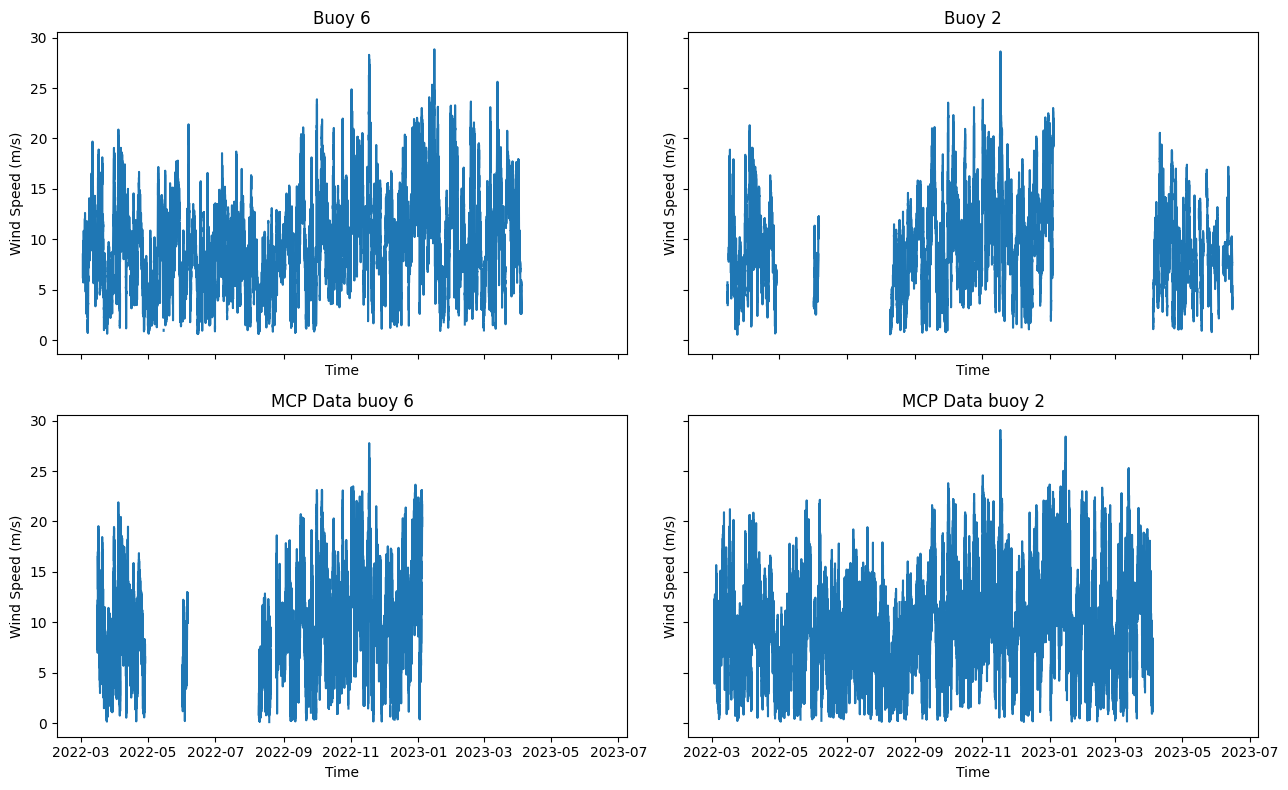

In [6]:
time2 = xrbuoy2.variables['time'][:]
windspeed_mcp_buoy2 = buoy2_file.groups['ZX_LIDAR_WLBZ_6_MCP'].variables['wind_speed'][:]
windspeed2 = buoy2_file.groups['ZX_LIDAR_WLBZ_2'].variables['wind_speed'][:]

time6 = xrbuoy6.variables['time'][:]
windspeed_mcp_buoy6 = buoy6_file.groups['ZX_LIDAR_WLBZ_2_MCP'].variables['wind_speed'][:]
windspeed6 = buoy6_file.groups['ZX_LIDAR_WLBZ_6'].variables['wind_speed'][:]

# Creating a figure with 4 subplots arranged in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(13, 8), sharey=True, sharex=True)

axes[0, 0].plot(time6, windspeed6[:, 0, 0, 2])
axes[0, 0].set_title('Buoy 6')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Wind Speed (m/s)')

axes[0, 1].plot(time2, windspeed2[:, 0, 0, 2])
axes[0, 1].set_title('Buoy 2')
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Wind Speed (m/s)')

axes[1, 0].plot(time6, windspeed_mcp_buoy6[:, 0, 0, 2])
axes[1, 0].set_title('MCP Data buoy 6')
axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('Wind Speed (m/s)')

axes[1, 1].plot(time2, windspeed_mcp_buoy2[:, 0, 0, 2])
axes[1, 1].set_title('MCP Data buoy 2')
axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Wind Speed (m/s)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()